In [1]:
# Youwen Liu
# Analyse the stroke dataset analyse
# For EDA
#
# 1. Prepare Problem #

#    a. Load libraries #

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#    b. Load dataset #
input_file = '/Users/youwen/Downloads/healthcare-dataset-stroke-data/train_2v.csv'
dataset = pd.read_csv(input_file)
print(dataset)

          id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  

In [3]:
# 2. Summarize Data #

#    a. Descriptive statistics #
# Summary
dataset.describe() #equivalent to summary in R

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [4]:
# VarType (Pandas version to check)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
# VarType (another Pandas version to check)
print(dataset.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [6]:
# check if any field include NA value ~
dataset.isnull().values.any()

True

In [7]:
dataset = dataset.fillna(0)

In [8]:
# check again if any field include NA value ~
dataset.isnull().values.any()

False

In [9]:
# There are many 'bool' and 'object' string values within columns, we need to convert them into integer first here

# We first transfer the either 'object' type columns and 'bool' columns into 
# category value
dataset['gender'] = dataset['gender'].astype('category')
dataset['ever_married'] = dataset['ever_married'].astype('category')
dataset['work_type'] = dataset['work_type'].astype('category')
dataset['Residence_type'] = dataset['Residence_type'].astype('category')
dataset['smoking_status'] = dataset['smoking_status'].astype('category')

In [10]:
# Then we selected all above transfered columns
cat_columns = dataset.select_dtypes(['category']).columns
print(cat_columns)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [11]:
# Then we transfer all those category value into integer like below command
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)
print(dataset)

          id  gender   age  hypertension  heart_disease  ever_married  \
0      30669       1   3.0             0              0             0   
1      30468       1  58.0             1              0             1   
2      16523       0   8.0             0              0             0   
3      56543       0  70.0             0              0             1   
4      46136       1  14.0             0              0             0   
...      ...     ...   ...           ...            ...           ...   
43395  56196       0  10.0             0              0             0   
43396   5450       0  56.0             0              0             1   
43397  28375       0  82.0             1              0             1   
43398  27973       1  40.0             0              0             1   
43399  36271       0  82.0             0              0             1   

       work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0              4               0              

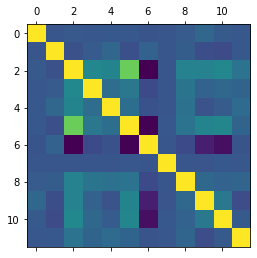

In [12]:
# Corr Matrix

#Simple version of the corr matrix
plt.matshow(dataset.corr())
plt.show()

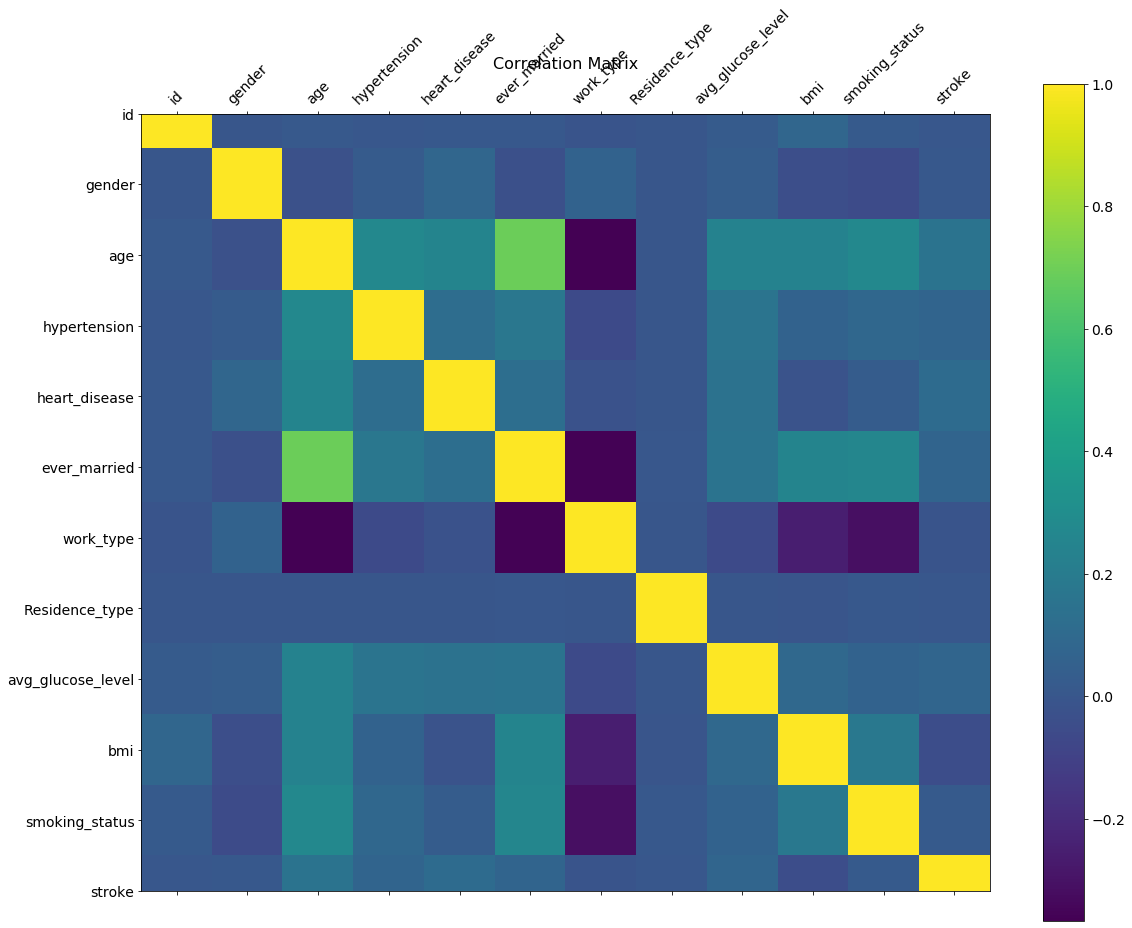

In [13]:
# Another version of the advanced version of corr matrix visulization.

f = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [14]:
# Another fancy version of the visulization to present same information of corr matrix by using built in pandas tools.

corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1,0.0017,0.013,0.0066,0.0092,0.01,-0.01,0.00012,0.025,0.085,0.018,0.003
gender,0.0017,1,-0.028,0.024,0.082,-0.031,0.064,0.0015,0.035,-0.039,-0.054,0.011
age,0.013,-0.028,1,0.27,0.25,0.69,-0.37,0.0013,0.24,0.24,0.27,0.16
hypertension,0.0066,0.024,0.27,1,0.12,0.18,-0.061,-0.0031,0.16,0.065,0.089,0.075
heart_disease,0.0092,0.082,0.25,0.12,1,0.13,-0.022,-0.0027,0.15,-0.017,0.032,0.11
ever_married,0.01,-0.031,0.69,0.18,0.13,1,-0.36,0.0044,0.15,0.25,0.26,0.072
work_type,-0.01,0.064,-0.37,-0.061,-0.022,-0.36,1,-0.0035,-0.059,-0.25,-0.31,-0.011
Residence_type,0.00012,0.0015,0.0013,-0.0031,-0.0027,0.0044,-0.0035,1,1.4e-05,-0.0058,0.0073,0.0022
avg_glucose_level,0.025,0.035,0.24,0.16,0.15,0.15,-0.059,1.4e-05,1,0.093,0.063,0.079
bmi,0.085,-0.039,0.24,0.065,-0.017,0.25,-0.25,-0.0058,0.093,1,0.18,-0.046


In [15]:
#Count of class labels
dataset.groupby('stroke').size()

stroke
0    42617
1      783
dtype: int64

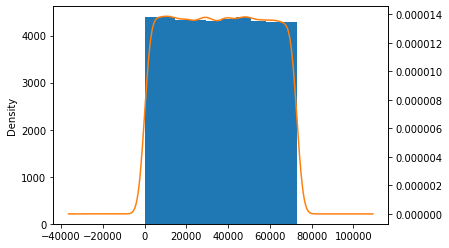

In [16]:
#    b. Visulization 
# visulize the target dependency "id" in histogram & density by using pandas library
ax = dataset.id.plot(kind='hist')
dataset.id.plot(kind='kde', ax=ax, secondary_y=True)

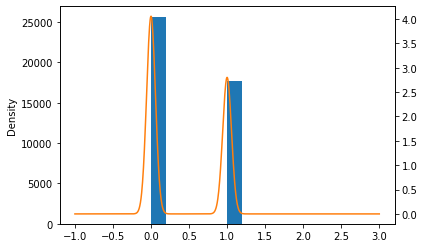

In [17]:
#    b. Visulization 
# visulize the target dependency "gender" in histogram & density by using pandas library
ax = dataset.gender.plot(kind='hist')
dataset.gender.plot(kind='kde', ax=ax, secondary_y=True)

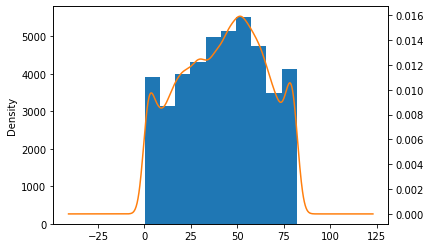

In [18]:
#    b. Visulization 
# visulize the target dependency "age" in histogram & density by using pandas library
ax = dataset.age.plot(kind='hist')
dataset.age.plot(kind='kde', ax=ax, secondary_y=True)

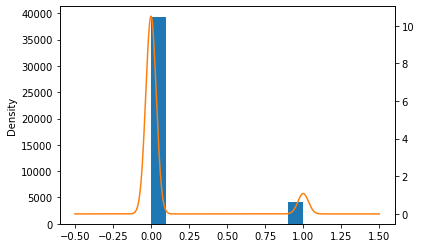

In [19]:
#    b. Visulization 
# visulize the target dependency "hypertension" in histogram & density by using pandas library
ax = dataset.hypertension.plot(kind='hist')
dataset.hypertension.plot(kind='kde', ax=ax, secondary_y=True)

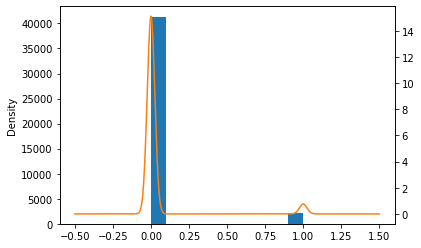

In [20]:
#    b. Visulization 
# visulize the target dependency "heart_disease" in histogram & density by using pandas library
ax = dataset.heart_disease.plot(kind='hist')
dataset.heart_disease.plot(kind='kde', ax=ax, secondary_y=True)

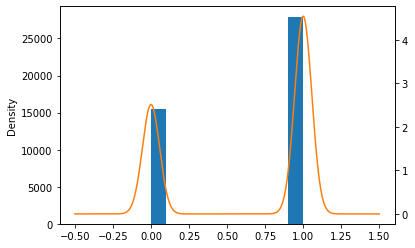

In [21]:
#    b. Visulization 
# visulize the target dependency "ever_married" in histogram & density by using pandas library
ax = dataset.ever_married.plot(kind='hist')
dataset.ever_married.plot(kind='kde', ax=ax, secondary_y=True)

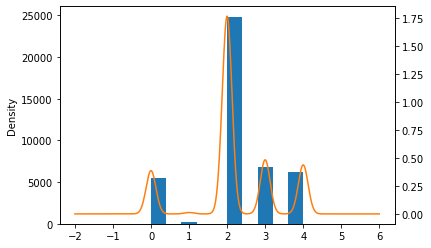

In [22]:
#    b. Visulization 
# visulize the target dependency "work_type" in histogram & density by using pandas library
ax = dataset.work_type.plot(kind='hist')
dataset.work_type.plot(kind='kde', ax=ax, secondary_y=True)

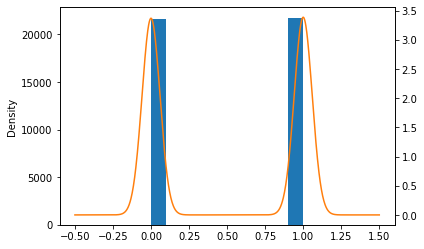

In [23]:
#    b. Visulization 
# visulize the target dependency "Residence_type" in histogram & density by using pandas library
ax = dataset.Residence_type.plot(kind='hist')
dataset.Residence_type.plot(kind='kde', ax=ax, secondary_y=True)

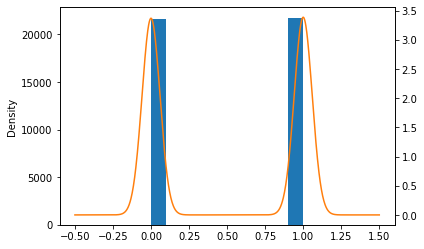

In [24]:
#    b. Visulization 
# visulize the target dependency "Residence_type" in histogram & density by using pandas library
ax = dataset.Residence_type.plot(kind='hist')
dataset.Residence_type.plot(kind='kde', ax=ax, secondary_y=True)

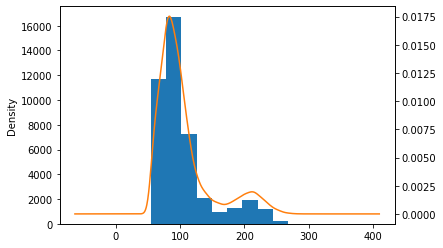

In [25]:
#    b. Visulization 
# visulize the target dependency "avg_glucose_level" in histogram & density by using pandas library
ax = dataset.avg_glucose_level.plot(kind='hist')
dataset.avg_glucose_level.plot(kind='kde', ax=ax, secondary_y=True)

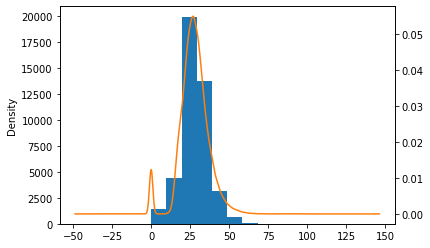

In [26]:
#    b. Visulization 
# visulize the target dependency "bmi" in histogram & density by using pandas library
ax = dataset.bmi.plot(kind='hist')
dataset.bmi.plot(kind='kde', ax=ax, secondary_y=True)

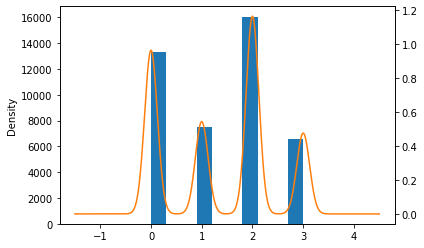

In [27]:
#    b. Visulization 
# visulize the target dependency "smoking_status" in histogram & density by using pandas library
ax = dataset.smoking_status.plot(kind='hist')
dataset.smoking_status.plot(kind='kde', ax=ax, secondary_y=True)

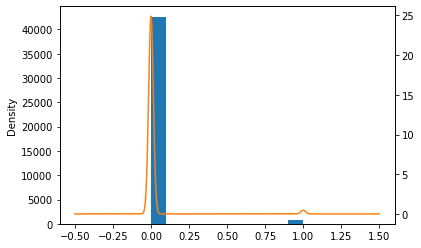

In [28]:
#    b. Visulization 
# visulize the target dependency "stroke" in histogram & density by using pandas library
ax = dataset.stroke.plot(kind='hist')
dataset.stroke.plot(kind='kde', ax=ax, secondary_y=True)

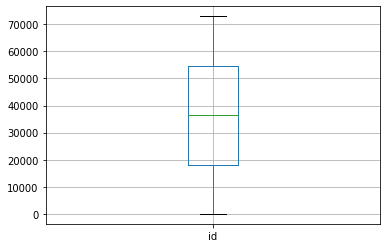

In [29]:
"""
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
"""

# Density
boxplot = dataset.boxplot(column=['id'])

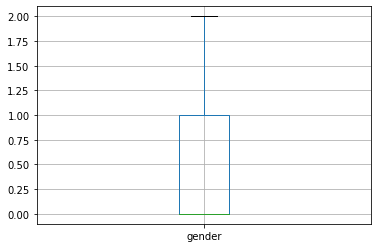

In [30]:
boxplot = dataset.boxplot(column=['gender'])

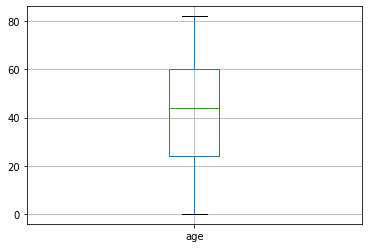

In [31]:
boxplot = dataset.boxplot(column=['age'])

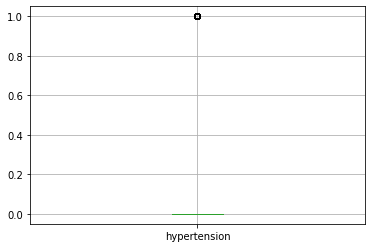

In [32]:
boxplot = dataset.boxplot(column=['hypertension'])

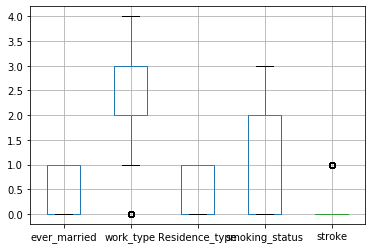

In [33]:
"""
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
"""

boxplot = dataset.boxplot(column=['ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'])



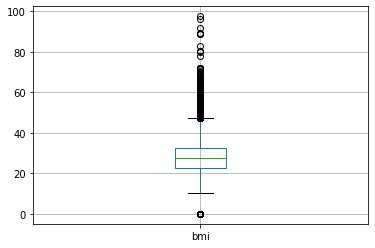

In [34]:
boxplot = dataset.boxplot(column=['bmi'])

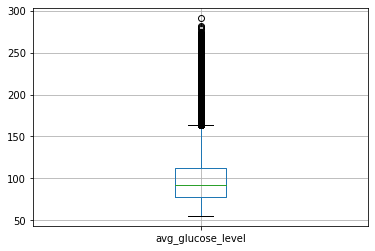

In [35]:
boxplot = dataset.boxplot(column=['avg_glucose_level'])

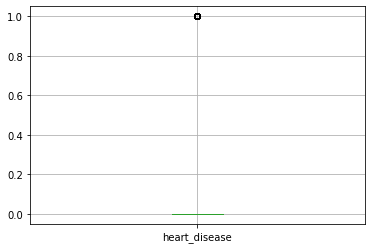

In [36]:
boxplot = dataset.boxplot(column=['heart_disease'])

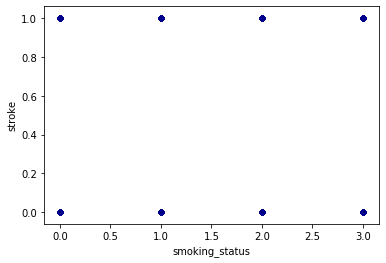

In [37]:
ax = dataset.plot.scatter(x='smoking_status', y='stroke', c='DarkBlue')

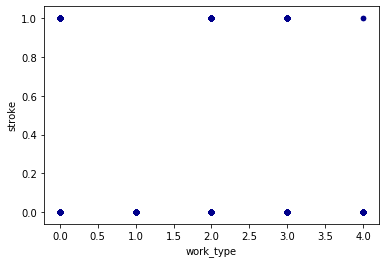

In [38]:
ax = dataset.plot.scatter(x='work_type', y='stroke', c='DarkBlue')

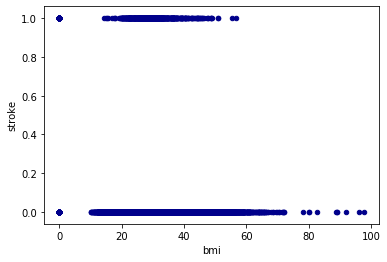

In [39]:
"""
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
"""
ax = dataset.plot.scatter(x='bmi', y='stroke', c='DarkBlue')

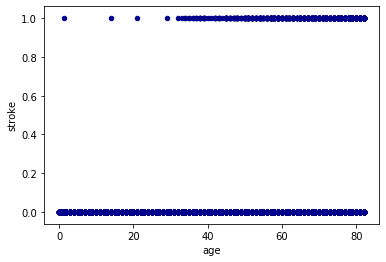

In [40]:
ax = dataset.plot.scatter(x='age', y='stroke', c='DarkBlue')

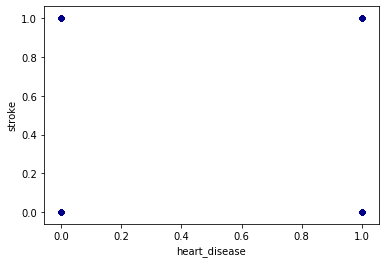

In [41]:
ax = dataset.plot.scatter(x='heart_disease', y='stroke', c='DarkBlue')

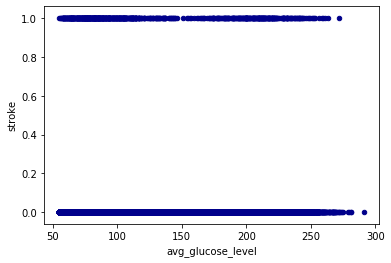

In [42]:
ax = dataset.plot.scatter(x='avg_glucose_level', y='stroke', c='DarkBlue')

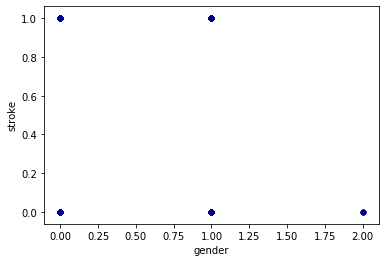

In [43]:
ax = dataset.plot.scatter(x='gender', y='stroke', c='DarkBlue')

In [57]:
# 4. Evaluate Algorithms
#    a. Split-out validation dataset.
np.random.seed(888)
msk = np.random.rand(len(dataset)) <= 0.666
train = dataset[msk]
test = dataset[~msk]
print(train['stroke'].value_counts(), len(train))
print(test['stroke'].value_counts(), len(test))

0    28326
1      520
Name: stroke, dtype: int64 28846
0    14291
1      263
Name: stroke, dtype: int64 14554


In [58]:
features = list(dataset.columns[1:-1])
print(features)
y = train["stroke"]
X = train[features]

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [59]:
# Linear Regression 

from sklearn import linear_model
from sklearn.metrics import roc_auc_score

model_LinearRegression = linear_model.LinearRegression()
model_LinearRegression.fit(X, y)

y_pred_LinearRegression = model_LinearRegression.predict(test[features])
y_true = list(test["stroke"])

AUC_ROC_SCORE_LinearRegression = roc_auc_score(y_true, y_pred_LinearRegression)
print(AUC_ROC_SCORE_LinearRegression)

0.8646692738895734


In [60]:
#################### Random Forest ######################

#Normal sample
from sklearn.ensemble import RandomForestClassifier

model_randomforest_v01 = RandomForestClassifier(n_estimators=1000, max_depth=200, random_state=8)
model_randomforest_v01.fit(X, y)

y_pred_random_forest_v01 = model_randomforest_v01.predict(test[features])
y_true = list(test["stroke"])

AUC_ROC_SCORE_random_forest_v01 = roc_auc_score(y_true, y_pred_random_forest_v01)
print(AUC_ROC_SCORE_random_forest_v01)

0.49982506472605137


In [61]:
param = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.1,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training # binary:logistic #multi:softprob
    'scale_pos_weight': 54.47,
    'feature_selector': 'greedy',
    'num_class': 2,
    'tree_method': 'hist'
    #'grow_policy': 'lossguide', # depthwise #Controls a way new nodes are added to the tree.
}  # the number of classes that exist in this datset #'num_class': 2

num_round = 2000  # the number of training iterations

In [63]:


import xgboost as xgb
import time

title_str = 'gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke'
training_list = title_str.split(',')[:-1]
def train_model_xgboost(feature_train, target_train):

    dtrain = xgb.DMatrix(feature_train, label=target_train, feature_names=training_list)
    bst = xgb.train(param, dtrain, num_round)
    return bst
    
print("Is training the xgboost model...")
start = time.time()
model_bst = train_model_xgboost(X, y)
print("Training process finished! Time cost:", time.time() - start)

Is training the xgboost model...
Training process finished! Time cost: 10.470676183700562


In [64]:
def inference_xgboost(bst, feature_test, target_test):
    dtest = xgb.DMatrix(feature_test, label=target_test, feature_names=training_list)
    preds = bst.predict(dtest)
    return preds

print('Is inference the predicted results by using the validation data...')
prediction_result = inference_xgboost(model_bst, test[features], test["stroke"])
print('Inference finished!')

Is inference the predicted results by using the validation data...
Inference finished!


In [67]:
def print_feature_importance(importance_dict):
    sorted_importance_dict = sorted(importance_dict.items(), key=lambda kv: kv[1], reverse=True)
    print('Credit Card Fraud Detection Feature Importance List:')
    for item in sorted_importance_dict:
        print('Feature Name:', item[0], '\t\t', 'Feature Abs_importance:', item[1])
            
print("Generating the feature importance list...")
importance_dict = model_bst.get_score(importance_type='gain')
print_feature_importance(importance_dict)

Generating the feature importance list...
Credit Card Fraud Detection Feature Importance List:
Feature Name: age 		 Feature Abs_importance: 0.46068369884065963
Feature Name: hypertension 		 Feature Abs_importance: 0.34415305599754664
Feature Name: heart_disease 		 Feature Abs_importance: 0.3181490283084244
Feature Name: gender 		 Feature Abs_importance: 0.30911578273164614
Feature Name: Residence_type 		 Feature Abs_importance: 0.3073514011564947
Feature Name: work_type 		 Feature Abs_importance: 0.2960490140094185
Feature Name: ever_married 		 Feature Abs_importance: 0.279081929951953
Feature Name: smoking_status 		 Feature Abs_importance: 0.2761831395254201
Feature Name: bmi 		 Feature Abs_importance: 0.25428167385229944
Feature Name: avg_glucose_level 		 Feature Abs_importance: 0.24890725431240043


In [68]:
from sklearn.metrics import accuracy_score
import numpy as np

ylabel = np.argmax(prediction_result, axis=1)
y_true = list(test["stroke"])

AUC_ROC_SCORE_xgb_v01 = roc_auc_score(y_true, ylabel)
print(AUC_ROC_SCORE_xgb_v01)


0.5134947597905885
